In [1]:
from pynq import Overlay, allocate
from pynq.lib.video import *
from time import sleep, time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ol = Overlay("CL_VDMA_Z7P.bit")

In [3]:
CLRX = ol.CameraLinkRX_0
vdma = ol.axi_vdma_0
timer = ol.axi_timer_0

### Config VDMA

In [4]:
# WIDTH = 2048 # 4tap
WIDTH = 1024 # 8tap
HEIGHT = 1
STRIDE = 8192*4
BITS = 64
vdma.readchannel.stop()
vdma.readchannel.mode = VideoMode(width=WIDTH, height=HEIGHT, bits_per_pixel=BITS, fps=100000, stride=STRIDE)
vdma.readchannel.start()

### Config the AXI Timer to run in PWM mode

In [5]:
PWM_PERIOD = 10000  # number of clocks
PWM_HIGH_TIME = 10
TLR0 = PWM_PERIOD - 2
TLR1 = PWM_HIGH_TIME - 2
TCSR0 = 0x0606
TCSR1 = 0x0606
timer.write(0x4, TLR0)
timer.write(0x14, TLR1)
timer.write(0x0, TCSR0)
timer.write(0x10, TCSR1)

### Config the CameraLinkRX to use external trigger or external PWM

In [6]:
# External Trigger
# CLRX.write(0x0, 0x3)

# External PWM
CLRX.write(0x0, 0x1)

### Read one frame and plot

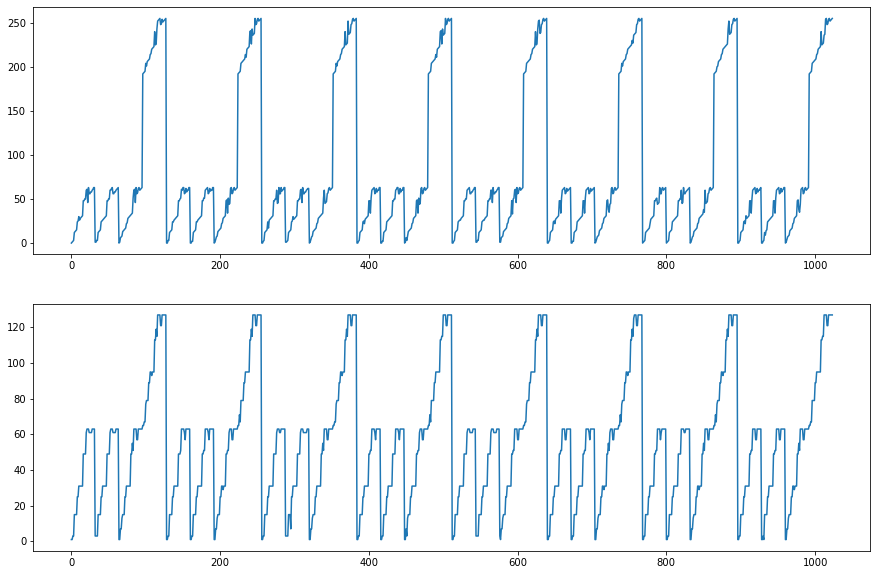

In [44]:
frame = vdma.readchannel.readframe()
plt.figure(figsize=(15, 10))
plt.ylim((0, 256))
for i in range(8):
    plt.subplot(8, 1, i+1)
    plt.plot(frame[0, :, i])
plt.savefig("clnk=2.png")

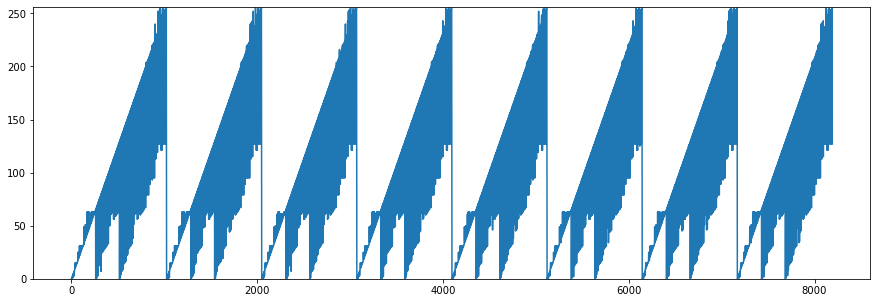

In [43]:
frame = frame.reshape((1, 8192))
plt.figure(figsize=(15, 5))
plt.ylim((0, 256))
plt.plot(frame[0, :])

In [ ]:
N_frame = 1000
t_start = time()
for i in range(N_frame):
    frame = vdma.readchannel.readframe()
t_end = time()
t_second = t_end - t_start
fps = N_frame / t_second
print("FPS:", fps)

### Stop VDMA before exit

In [45]:
vdma.readchannel.stop()